In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [ ]:
from keras.datasets import mnist

(X_train, y_train) , (X_test, y_test) =mnist.load_data()

(28, 28)


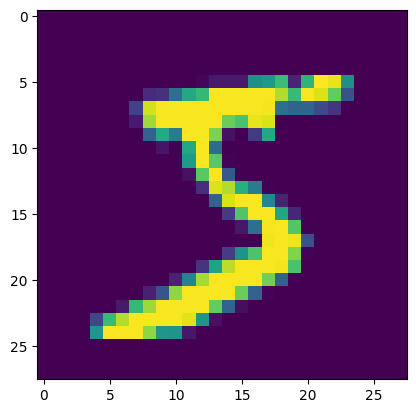

In [ ]:
print(X_train[0].shape)
plt.imshow(X_train[0])

In [ ]:
X_train_scaled  =np.array([x.ravel()/255. for x in X_train])
X_test_scaled  =np.array([x.ravel()/255. for x in X_test])

In [ ]:
X_train_scaled.shape, X_test_scaled.shape

((60000, 784), (10000, 784))

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

y_train_onehot = enc.fit_transform(y_train.reshape(-1,1)).toarray()
y_test_onehot = enc.fit_transform(y_test.reshape(-1,1)).toarray()

In [ ]:
print(y_train[0])
print(y_train_onehot[0])
print(y_train_onehot.shape)

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
(60000, 10)


In [ ]:
class LogisticRegression:
  def __init__(self,lr, epoch):
    self.lr = lr
    self.epoch = epoch
    self.w = None
    self.loss_list =None
  def predict(self,X):
    h = np.dot(X, self.w)
    softmax = np.exp(h)
    y_pred = softmax / np.sum(softmax, axis=1, keepdims=True)
    return y_pred
  def loss(self,X,y):
    y_pred = self.predict(X)
    return -np.sum(y*np.log(y_pred)) / y.shape[0]
  def grad(self,X, y):
    y_pred =self.predict(X)
    delta = y_pred - y
    return np.dot(X.T, delta)/X.shape[0]
  def train(self, X ,y):
    self.w = np.zeros((X.shape[1],10))
    self.loss_list =[]
    for i in range(self.epoch):
      self.w -= self.lr*self.grad(X, y)
      self.loss_list.append(self.loss(X,y))
      if (i%(self.epoch/10)==0):
          print("cost after",i,"iter is", self.loss(X,y))
    return self.w, self.loss_list
  def evaluate(self,X,y):
    y_pred = self.predict(X)
    y_pred = np.argmax(y_pred,axis=1)
    # recall and precision
    print('accuracy: ',accuracy_score(np.argmax(y_test_onehot, axis=1), y_pred))
    print("recall:",recall_score(np.argmax(y_test_onehot, axis=1), y_pred, average='macro'))
    print("precision:",precision_score(np.argmax(y_test_onehot, axis=1), y_pred, average='macro'))
    return y_pred

cost after 0 iter is 2.196978972468437
cost after 200 iter is 0.4911963557971076
cost after 400 iter is 0.41519372450516007
cost after 600 iter is 0.3831187533765099
cost after 800 iter is 0.3643212588428755
cost after 1000 iter is 0.35157919282666866
cost after 1200 iter is 0.3421959727051371
cost after 1400 iter is 0.33490586421929935
cost after 1600 iter is 0.329025159164242
cost after 1800 iter is 0.3241474205907823
accuracy:  0.9147
recall: 0.9135049071479951
precision: 0.9137274182552038


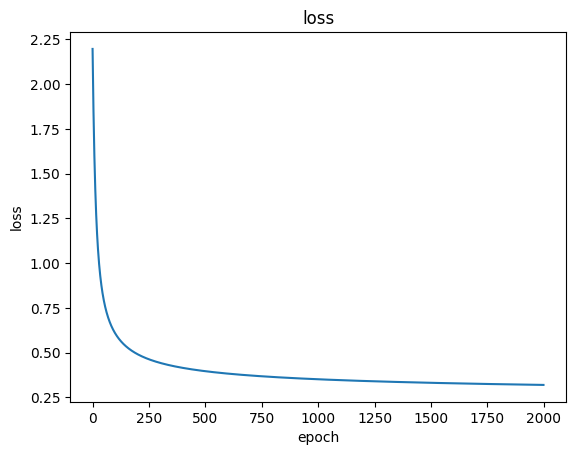

In [ ]:
model = LogisticRegression(lr= 0.1, epoch=2000)
w, loss_list = model.train(X_train_scaled, y_train_onehot)
y_pred = model.evaluate(X_test_scaled, y_test_onehot)
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(loss_list)

In [ ]:
# calculate the accuracy
from sklearn.metrics import precision_score, recall_score, accuracy_score
y_pred = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred,axis=1)
print(y_pred)
print('accuracy: ',accuracy_score(np.argmax(y_test_onehot, axis=1), y_pred))
print("recall:",recall_score(np.argmax(y_test_onehot, axis=1), y_pred, average='macro'))
print("precision:",precision_score(np.argmax(y_test_onehot, axis=1), y_pred, average='macro'))

[7 2 1 ... 4 5 6]
accuracy:  0.9147
recall: 0.9135049071479951
precision: 0.9137274182552038


In [ ]:
np.save('mnist_softmax_model.npy', w)